In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [22]:
start = '2020-01-01'
end = '2024-04-12'

# Get the data
df = yf.download('RELIANCE.NS', start=start, end=end)
df = df[['Open', 'High', 'Low', 'Close']]
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close
Date                                                          
2020-01-01  1387.957031  1396.277466  1376.527954  1380.276611
2020-01-02  1382.471069  1408.941040  1382.471069  1403.775024
2020-01-03  1401.671997  1409.581055  1392.528687  1405.466553
2020-01-06  1389.785767  1397.008911  1369.670410  1372.870605
2020-01-07  1388.871338  1403.043579  1383.842529  1393.991699


In [23]:
df.tail()

,Open,High,Low,Close
Date,,,,
2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902
2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951
2024-04-01,2984.949951,2987.949951,2965.000000,2969.550049
2024-04-02,2968.000000,2988.000000,2950.000000,2973.899902


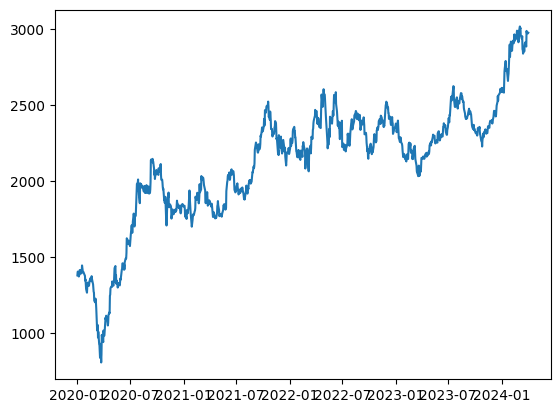

In [24]:
plt.plot(df.Close)

In [25]:
df

,Open,High,Low,Close
Date,,,,
2020-01-01,1387.957031,1396.277466,1376.527954,1380.276611
2020-01-02,1382.471069,1408.941040,1382.471069,1403.775024
2020-01-03,1401.671997,1409.581055,1392.528687,1405.466553
2020-01-06,1389.785767,1397.008911,1369.670410,1372.870605
2020-01-07,1388.871338,1403.043579,1383.842529,1393.991699
...,...,...,...,...
2024-03-26,2890.000000,2904.800049,2878.000000,2883.149902
2024-03-27,2896.000000,3000.000000,2894.000000,2985.699951
2024-03-28,2985.750000,3011.899902,2957.300049,2971.699951


In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-03-26    2663.825493
2024-03-27    2670.557493
2024-03-28    2677.395493
2024-04-01    2684.116995
2024-04-02    2690.653994
Name: Close, Length: 1054, dtype: float64

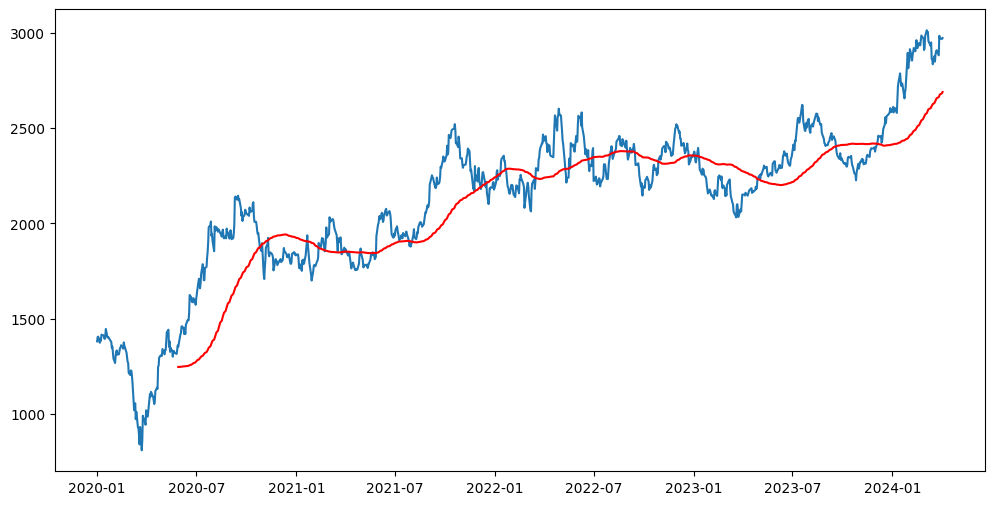

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [28]:
ma200 = df.Close.rolling(200).mean()
ma200

Date
2020-01-01            NaN
2020-01-02            NaN
2020-01-03            NaN
2020-01-06            NaN
2020-01-07            NaN
                 ...     
2024-03-26    2540.672771
2024-03-27    2544.168766
2024-03-28    2547.585070
2024-04-01    2550.903861
2024-04-02    2554.237480
Name: Close, Length: 1054, dtype: float64

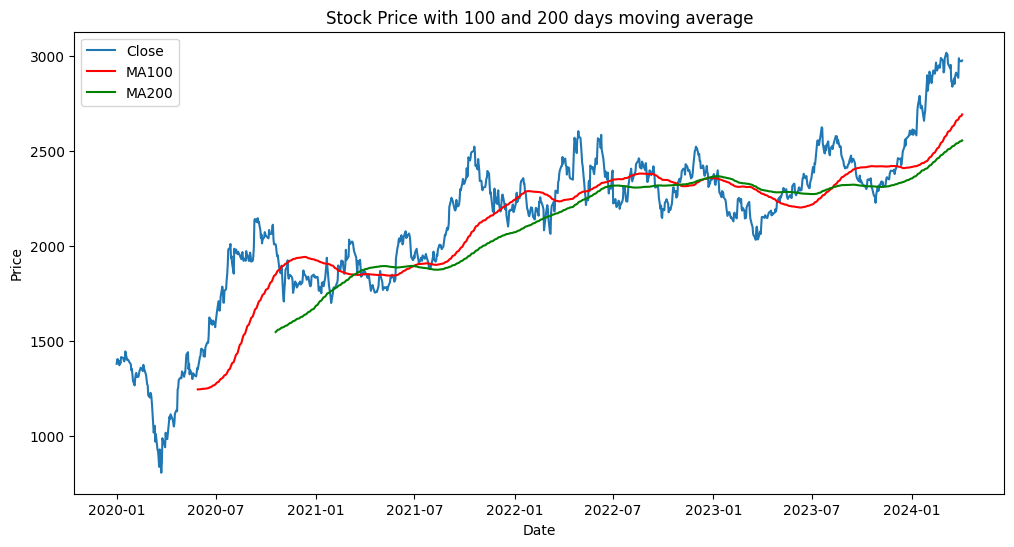

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.legend(['Close', 'MA100', 'MA200'])
plt.title('Stock Price with 100 and 200 days moving average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [30]:
df.shape

(1054, 4)

In [31]:
# splitting the data into training and test set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(737, 1)
(317, 1)


In [32]:
data_training.head()

,Close
Date,
2020-01-01,1380.276611
2020-01-02,1403.775024
2020-01-03,1405.466553
2020-01-06,1372.870605
2020-01-07,1393.991699


In [33]:
data_testing.head()

,Close
Date,
2022-12-19,2399.153076
2022-12-20,2419.920654
2022-12-21,2385.492676
2022-12-22,2379.308594
2022-12-23,2309.529785


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.31874677],
       [0.33184215],
       [0.33278482],
       [0.3146195 ],
       [0.32639002],
       [0.32055571],
       [0.33831341],
       [0.33813504],
       [0.33612236],
       [0.32883585],
       [0.32600784],
       [0.33316694],
       [0.35512844],
       [0.330339  ],
       [0.33112881],
       [0.33084853],
       [0.32753651],
       [0.32483592],
       [0.31719267],
       [0.29946048],
       [0.30358782],
       [0.28519317],
       [0.26883672],
       [0.25551209],
       [0.27635256],
       [0.28761349],
       [0.29235227],
       [0.28004677],
       [0.28104039],
       [0.2897791 ],
       [0.29872162],
       [0.30068335],
       [0.3075368 ],
       [0.3027725 ],
       [0.29724391],
       [0.31579142],
       [0.30669604],
       [0.28580461],
       [0.2712571 ],
       [0.25882411],
       [0.25589427],
       [0.22654434],
       [0.22017506],
       [0.2337799 ],
       [0.23217484],
       [0.21762733],
       [0.19716898],
       [0.117

In [36]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
#ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

In [38]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 100) #Train the model using the training data

Epoch 1/200
20/20 [==============================] - 10s 149ms/step - loss: 0.1848
Epoch 2/200
20/20 [==============================] - 3s 148ms/step - loss: 0.0236
Epoch 3/200
20/20 [==============================] - 3s 147ms/step - loss: 0.0197
Epoch 4/200
20/20 [==============================] - 3s 152ms/step - loss: 0.0173
Epoch 5/200
20/20 [==============================] - 3s 154ms/step - loss: 0.0191
Epoch 6/200
20/20 [==============================] - 3s 174ms/step - loss: 0.0204
Epoch 7/200
20/20 [==============================] - 3s 150ms/step - loss: 0.0171
Epoch 8/200
20/20 [==============================] - 3s 151ms/step - loss: 0.0174
Epoch 9/200
20/20 [==============================] - 3s 151ms/step - loss: 0.0159
Epoch 10/200
20/20 [==============================] - 3s 146ms/step - loss: 0.0172
Epoch 11/200
20/20 [==============================] - 3s 145ms/step - loss: 0.0158
Epoch 12/200
20/20 [==============================] - 3s 149ms/step - loss: 0.0145
Epoch 13/200

In [41]:
model.save('./LSTM_model.h5')

C:\Users\Aditya\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
data_testing.head()

,Close
Date,
2022-12-19,2399.153076
2022-12-20,2419.920654
2022-12-21,2385.492676
2022-12-22,2379.308594
2022-12-23,2309.529785


In [43]:
past_100_days = data_training.tail(100)

In [44]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_20200\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [45]:
final_df.head()

,Close
0,2310.360596
1,2234.028320
2,2235.043701
3,2232.920898
4,2267.902588


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28341223],
       [0.20576358],
       [0.20679647],
       [0.20463706],
       [0.24022202],
       [0.28937414],
       [0.35077941],
       [0.35998081],
       [0.38035527],
       [0.34800955],
       [0.31242459],
       [0.34354966],
       [0.35796221],
       [0.36603684],
       [0.40537737],
       [0.42255953],
       [0.43556368],
       [0.43194893],
       [0.38739726],
       [0.38058996],
       [0.41833458],
       [0.41171504],
       [0.40448554],
       [0.39129364],
       [0.37218676],
       [0.41002501],
       [0.337212  ],
       [0.30913841],
       [0.34603789],
       [0.3714355 ],
       [0.35725789],
       [0.36068488],
       [0.34556851],
       [0.37256226],
       [0.39293673],
       [0.36345474],
       [0.33937165],
       [0.2797503 ],
       [0.28280179],
       [0.28317729],
       [0.28965602],
       [0.26745047],
       [0.223697  ],
       [0.16534323],
       [0.18308889],
       [0.12318591],
       [0.11647273],
       [0.165

In [47]:
input_data.shape

(417, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [49]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(317, 100, 1)
(317,)


In [50]:
#making predictions
y_pred = model.predict(x_test)

10/10 [==============================] - 2s 58ms/step


In [51]:
y_pred.shape

(317, 1)

In [61]:
y_test

array([361169.8445948 , 381585.25685826, 347741.09021719, 341661.8746544 ,
       273066.33904983, 292891.82980308, 311628.67776942, 311401.87718881,
       310358.35451739, 313896.92357612, 339937.95024115, 322834.30645582,
       287901.49702783, 283818.36657502, 304551.29965133, 358901.35878748,
       324059.26959173, 294797.43468143, 245301.38797155, 241672.09868057,
       220349.48409468, 251834.44469618, 248114.19517234, 245709.86901726,
       219033.80072653, 207827.93203951, 194807.65870761, 164502.06112528,
       123490.03613449, 143814.7281657 , 138461.27446086, 125803.88205794,
       114053.69197745, 115913.69673906,  99989.65597352,  94953.96308215,
       136737.35004762, 140457.35957084, 122854.99450879, 110787.28361545,
       160464.5307892 , 209325.05587214, 207601.1314589 , 216810.67503533,
       193401.25510721, 211276.02086661, 161190.29264715, 150846.50616706,
       165545.58379669, 151164.02697991, 110061.28175688, 129433.17134892,
       113236.96988664, 1

In [53]:
y_pred

array([[0.46699566],
       [0.46822107],
       [0.46904182],
       [0.4695363 ],
       [0.4697529 ],
       [0.46963525],
       [0.46917003],
       [0.4684161 ],
       [0.46743298],
       [0.4662562 ],
       [0.46492627],
       [0.46352047],
       [0.46209073],
       [0.46063417],
       [0.45913798],
       [0.4576143 ],
       [0.4561407 ],
       [0.45477208],
       [0.4535014 ],
       [0.45228872],
       [0.45111084],
       [0.44995332],
       [0.4488287 ],
       [0.44775128],
       [0.44672638],
       [0.4457146 ],
       [0.44463658],
       [0.44338426],
       [0.44186604],
       [0.4400189 ],
       [0.43775082],
       [0.43472928],
       [0.43057966],
       [0.42504305],
       [0.41813976],
       [0.41013116],
       [0.4012559 ],
       [0.3922019 ],
       [0.38322306],
       [0.37471378],
       [0.36685196],
       [0.35993916],
       [0.3539639 ],
       [0.34895796],
       [0.3448271 ],
       [0.341484  ],
       [0.3387822 ],
       [0.336

In [54]:
scaler.scale_

array([0.00101725])

In [57]:
# scale_factor = 1/0.00101725
scale_factor = 1/scaler.scale_
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

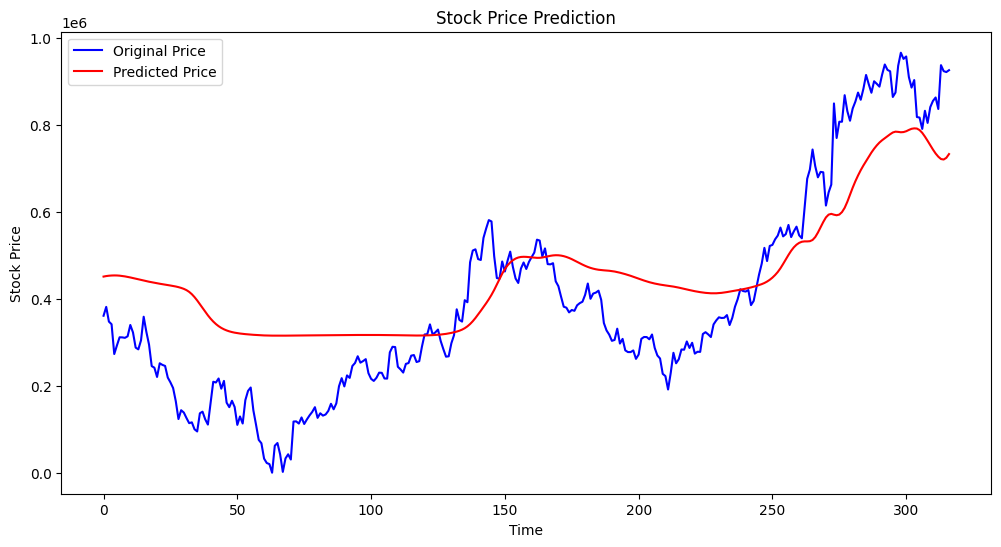

In [59]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()